In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import folium
import folium.plugins
from os import path
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [3]:
chart_studio.tools.set_credentials_file(username='bjosie',api_key='xp4FpbhzLtw7JlE45A5M')

<h1>Quick overview of instagram engagement for @stuckonplanetearth </h1>

<h4>Analyst: Ben Josie</h4>
<h5>bjosie01@gmail.com</h5>

<h2><strong>1. Followers vs. Engagement</strong></h2>

<h4>Overview</h4>

<p>Instagram integrates a <a href="https://sproutsocial.com/insights/instagram-algorithm/" target="blank">constantly  changing algorithm</a> for posts in their feed and as of today, <i>user engagement</i> is one of the most important metrics to watch.<p>
<p>
    A high follower count is great, but it's far more important to make sure that people who see your posts are taking the time to like, comment, share or visit your page. If you have a high level engagement on a post, that post will be pushed to the top of your followers' feeds. The higher level of engagement on a post, the more people are going to see it, and eventually it could end up on instagram's explore page, for users who are not already followers.
</p>

<h4>Methodology</h4>

<p>I looked at every post from this profile in the last six monthes (September 2020-March 2021). Every single account that liked or commented was saved and added to a spreadsheet, where we can even see the number of times they engaged in a given month! This is how I determined the set of "Engaged Users"</p>

<h3>Top Metrics At a Glance</h3>

<h4>Post Engagement for March 2020-March 2021</h4>
<h6>(data can be found in at_a_glance.csv)<h6>

In [17]:
aag = pd.read_csv('at_a_glance.csv')
aag

,Period,Posts,Likes,Comments,Likes per Post,Comments per Post,Engaged Users
0,September 2020,12,4493,447,374.416667,37.250000,1568
1,October 2020,13,4275,456,328.846154,35.076923,1647
2,November 2020,12,4036,367,336.333333,30.583333,1526
3,December 2020,9,2769,338,307.666667,37.555556,1200
4,January 2021,7,2676,339,382.285714,48.428571,1210
5,February 2021,6,3055,219,509.166667,36.500000,1780
6,March 2021,2,368,52,184.000000,26.000000,288


<p>Total Posts: <strong>61</strong></p>
<p>Total Likes: <strong>21672</strong></p>
<p>Total Comments: <strong>2218</strong></p>
<p>Likes Per Post: <strong>355</strong></p>
<p>Comments Per Post: <strong>36</strong></p>
<p style="color:crimson;">Engaged Users: <strong>4822</strong></p>

<h4><strong>Insights</strong></h4>
<ul>
    <li>Each user that engaged with @stuckonplanetearth engaged with an average of 5 posts! This conveys a strong loyalty and that each user is really interested in what the band is doing.</li>
    <li>The band is very consistent with their posting. Instagram's algorithm rewards consistent posting by expanding your reach.</li>
</ul>

In [22]:
index = aag['Period']

posts = go.Scatter(
    x = index[:-1],
    y = aag['Posts'],
    mode = 'lines+markers',
    name = "Total Posts",
    text = 'Posts'
)
likes = go.Scatter(
    x = index[:-1],
    y = aag['Likes per Post'],
    mode = 'lines+markers',
    name = "Likes Per Post",
    text = 'Average Likes per Post'
)
comments = go.Scatter(
    x = index[:-1],
    y = aag['Comments per Post'],
    mode = 'lines+markers',
    name = "Comments Per Post",
    text = 'Average Comments per Post'
)
engagement = go.Scatter(
    x = index[:-1],
    y = aag['Engaged Users'],
    mode = 'lines+markers',
    name = "Engaged Users",
    text = 'Engaged Users'
)
data = [likes,comments,posts,engagement]

In [23]:
layout = go.Layout(title = 'At A Glance Metrics: July-December 2020',
                  xaxis=dict(title='Period',ticklen=1,zeroline=True),
                  yaxis=dict(title='Values',ticklen=5,zeroline=True))

In [24]:
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, validate=False)

<h1>2. What can we learn about our "Hyperengaged Users"?</h1>

<h4>Sampled population methodology:</h4>
<ul>
<li>@stuckonplanetearth had <span  style="color:crimson;">4822 distinct users </span>interact with its posts in our selected timeframe. To gain insights about the audience, it makes sense to narrow down the sample size to a set of users more representative of Stuck on Planet Earth's audience.</li>
<li>In the spirit of data ethics, all users who marked their profiles "Private" were immediately removed from our sample, so as not to breach their privacy.</li>
<li>This sample pool of <i>public profiles who engaged at least once with @stuckonplanetearth</i> is tracked in <strong>public_engaged_users.csv</strong></li>
<li>Next, it is valuable to look at the users who engaged most frequently with @stuckonplanetearth in our time period. Because we can explore how many times each user engaged with @stuckonplanetearth, we can focus in on every user who engaged at least 4 times, to explore <span  style="color:crimson;">982 hyperengaged users</span></li>
<li>Our sample of "hyperengaged users" can be explored in <strong>hyperengaged_users.csv</strong></li>

<h3>What are they talking about?</h3>
<p>Armed with a list of hyperengaged, public users, we can explore their posts to learn a bit more about them.<p>

<h4>First, lets look at what hashtags they use:</h4>
<p><i>hyperengaged_users_used_tags.csv</i></p>

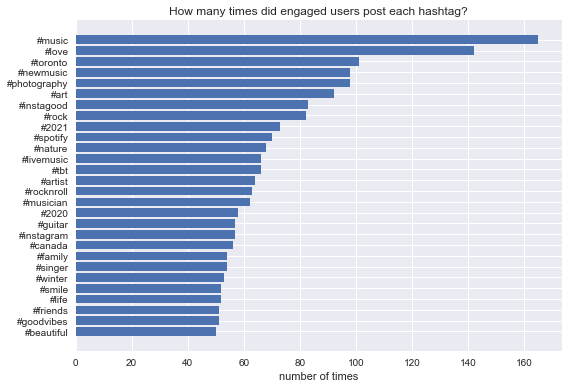

In [27]:
plt.style.use('seaborn')
used_tags = pd.read_csv('hyperengaged_users_used_tags.csv')
used_tags = used_tags[(used_tags['frequency'] >= 50)]
used_tags = used_tags.iloc[::-1]
plt.title('How many times did engaged users post each hashtag?')
plt.xlabel('number of times')
plt.barh(used_tags['hashtag'],used_tags['frequency'])
plt.tight_layout()
plt.savefig('plots/used_hashtags.png')

<h4><strong>Insights</strong></h4>
<ul>
    <li>#music has over 160 occurences, with over 140 for #love</li>
    <li>As a Toronto-based band, it's cool that #toronto and #canada end up high on this list. It helps show where there audience is largely found.</li>
    <li>#rocknroll, #guitar, #musician demonstrate that their fanbase is made up of a lot of musicians and rock fans.</li>
    <li>Believe it or not #spotify does not often pop up for artists' audiences. This suggests to me a younger, more tech-savvy crowd listening to the band.</li>
    <li>By using more of the hashtags on this list, it is likely the band will begin to reach instagram users that don't yet follow them.</li>
</ul>

<h1>4. Where are users posting from?</h1>

In [32]:
post_frame = pd.read_csv('hyperengaged_users_posts.csv')
if path.exists('hyperengaged_users_post_loc.csv'):
    print('Reading loc_frame from files...')
    loc_frame = pd.read_csv('hyperengaged_users_post_loc.csv')
else:
    loc_frame = post_frame[post_frame['latitude'].notnull()]
    loc_frame = loc_frame[loc_frame['longitude'].notnull()]
    loc_frame = loc_frame.sort_values('City').reset_index()
    loc_frame = loc_frame.drop(columns='index')
    loc_frame.to_csv('hyperengaged_user_post_loc.csv',index=False)    
loc_list = loc_frame[['latitude','longitude']].values.tolist()
post_map = folium.Map(location=[36.16, -86.78], zoom_start=4)
folium.plugins.FastMarkerCluster(data=loc_list).add_to(post_map)
post_map

<h4>Insights</h4>
<ul>
    <li>Stuck on Planet Earth has a <i>MASSIVE</i> following in Toronto compared to any other city.</li>
    <li>They ought to use this to their advantage by tagging specific locations in their posts, engaging with the city of Toronto and catering their content towards where their fans can be found.</li>
    <li>That being said, if they want to expand their reach across the United States, this visual shows where they could use some work.</li>
</ul>

<h2>In Conclusion</h2>
<ul>
    <li>@stuckonplanetearth has an extremely loyal following <i>in</i> Toronto.</li>
    <li>Engaged Users tend to be a younger, tech-savvy, crowd who love rock music.</li>
</ul>

<p>I hope this data report can be of service, please do not hesitate to reach out if I can offer any clarity, or further analysis.</p>
<p>I am constantly trying to build on this program, so if there are any specific questions you have about an Instagram audience, I can't wait to hear your ideas!</p>
<h2>Ben Josie</h2>
<h3>(206) 817 9257</h3>
<h3>bjosie01@gmail.com</h3>
<h3>Shred On!</h3>